# Contoh

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    #note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
    #from vaderSentiment import SentimentIntensityAnalyzer

# --- examples -------
sentences = ["VADER is smart, handsome, and funny.",      # positive sentence example
            "VADER is not smart, handsome, nor funny.",   # negation sentence example
            "VADER is smart, handsome, and funny!",       # punctuation emphasis handled correctly (sentiment intensity adjusted)
            "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
            "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
            "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
            "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!",# booster words & punctuation make this close to ceiling for score
            "The book was good.",                                     # positive sentence
            "The book was kind of good.",                 # qualified positive sentence is handled correctly (intensity adjusted)
            "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
            "At least it isn't a horrible book.",         # negated negative sentence with contraction
            "Make sure you :) or :D today!",              # emoticons handled
            "Today SUX!",                                 # negative slang with capitalization emphasis
            "Today only kinda sux! But I'll get by, lol"  # mixed sentiment example with slang and constrastive conjunction "but"
             ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    #note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
    #from vaderSentiment import SentimentIntensityAnalyzer

# --- examples -------
sentences = ["I love Sitoluama.",
             "I LOVE Sitoluama.",
             "I love Sitoluama!",
             "I love Sitoluama!!!",
             "I love Sitoluama :)",
             "I don't love Sitoluama.",
             "I don't love Sitoluama :()",
             ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

I love Sitoluama.------------------------------------------------ {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
I LOVE Sitoluama.------------------------------------------------ {'neg': 0.0, 'neu': 0.169, 'pos': 0.831, 'compound': 0.7125}
I love Sitoluama!------------------------------------------------ {'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}
I love Sitoluama!!!---------------------------------------------- {'neg': 0.0, 'neu': 0.165, 'pos': 0.835, 'compound': 0.7249}
I love Sitoluama :)---------------------------------------------- {'neg': 0.0, 'neu': 0.122, 'pos': 0.878, 'compound': 0.802}
I don't love Sitoluama.------------------------------------------ {'neg': 0.627, 'neu': 0.373, 'pos': 0.0, 'compound': -0.5216}
I don't love Sitoluama :()--------------------------------------- {'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'compound': -0.5216}


# Explore

In [3]:
import tweepy
import json

# Enter authorisations
consumer_key = 'T2jpeRHYO5SI8MRPpXfZaA1rY'
consumer_secret = 'RjBcmc5IY00vXBSnxc8lNgNpHe4pGlRKKpw5jq3yiD9lhXRbXA'
access_key = '99456418-ZgQrEMLxSvpPM7Q6QuPQeyczr05wpQ2AGjnfSNzcp'
access_secret = 'aTXY8K2sCyHzrw2lxuzoocTsVoyuP1wZr3griHk27QNYo'

# Set up your authorisations
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

# Set up API call
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())

In [ ]:
from tweepy import Stream
from tweepy.streaming import StreamListener
 
class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            with open('alltweet.json', 'a') as f:
                  f.write(data)
            return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['#FridayFeeling'])

In [5]:
#import regex
import re

#start process_tweet
def processTweet(tweet):
    # process the tweets
    #Convert www.* or https?://* to URL
    tweet = re.sub('(RT)',' ',tweet)    
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+',' ',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet
#end


In [6]:
import json

tweets = []
for line in open('alltweet.json', 'r'):
    data = json.loads(line)
    tweets.append(processTweet(data['text'].encode('utf-8')))
print "Number tweets: ", len(tweets)



Number tweets:  4500


In [7]:
text = processTweet(tweets[2])
print text

 bleepafilmtomakeitsounddirty WDW10K Flithy BTSoutcastD3 fireandfurybook FridayFeeling NationalBirdDay NationalScre…


In [8]:
tweet = []
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
for i in range(0, len(tweets)):
    tweet.append(tweets[i])
    vs_compound.append(analyzer.polarity_scores(tweets[i])['compound'])
    vs_pos.append(analyzer.polarity_scores(tweets[i])['pos'])
    vs_neu.append(analyzer.polarity_scores(tweets[i])['neu'])
    vs_neg.append(analyzer.polarity_scores(tweets[i])['neg'])

In [10]:
from pandas import Series, DataFrame

twitter_df = DataFrame({'Tweet': tweet,
                        'Compound': vs_compound,
                        'Positive': vs_pos,
                        'Neutral': vs_neu,
                        'Negative': vs_neg})
twitter_df = twitter_df[['Tweet', 'Compound',
                         'Positive', 'Neutral', 'Negative']]

# Have a look at the top 5 results.
twitter_df.head()

,Tweet,Compound,Positive,Neutral,Negative
0,GoCanadaGo! 🇨🇦 I know our team will make us...,0.7574,0.276,0.724,0.000
1,Please if you think that the longer Trump is ...,0.1531,0.166,0.724,0.110
2,bleepafilmtomakeitsounddirty WDW10K Flithy BT...,0.0000,0.000,1.000,0.000
3,Tangled web FridayFeeling,0.0000,0.000,1.000,0.000
4,NationalBirdDay FridayFeeling RelationshipsAr...,-0.6841,0.000,0.615,0.385


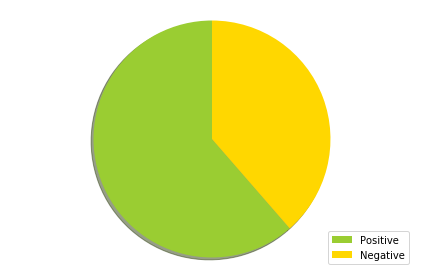

Total positive : 539.299
Total negative : 339.111


In [11]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Positive', 'Negative'
sizes = [sum(vs_pos), sum(vs_neg)]
colors = ['yellowgreen', 'gold']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()
print "Total positive :" , sum(vs_pos)
print "Total negative :" , sum(vs_neg)

Referensi:

http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html

http://t-redactyl.io/blog/2017/04/applying-sentiment-analysis-with-vader-and-the-twitter-api.html